In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [3]:
aqdq_df = pd.read_csv("adqd_df_2020_01_13.csv")

aqdq_df.head()

,name,name_url,time_received,amount,amount_url,comment
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No


In [4]:
amount_cleaned = [float(i.replace("$", "").replace(",", "")) for i in aqdq_df['amount']]
aqdq_df['amount_cleaned'] = amount_cleaned
aqdq_df.head()

,name,name_url,time_received,amount,amount_url,comment,amount_cleaned
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0


In [5]:
temp_time_list = []

for i in aqdq_df['time_received']:
    temp_date = datetime.datetime.strptime(i, "%d/%m/%Y %H:%M:%S +0000")
    temp_time_list.append(temp_date)
    
aqdq_df['time_received_cleaned'] = temp_time_list
aqdq_df.head()

,name,name_url,time_received,amount,amount_url,comment,amount_cleaned,time_received_cleaned
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-12-01 16:19:07
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-12-01 16:06:30
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-12-01 14:17:00
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-12-01 14:14:38
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-12-01 13:42:53


In [6]:
aqdq_df.describe()

,amount_cleaned
count,54100.000000
mean,57.891549
std,1551.282236
min,5.000000
25%,10.000000
50%,25.000000
75%,50.000000
max,356306.000000


(array([1.7850e+04, 5.9340e+03, 1.4832e+04, 5.1300e+02, 5.5020e+03,
        1.4800e+02, 7.9000e+01, 1.0500e+03, 2.6000e+01, 8.0000e+00]),
 array([ 5.  , 14.45, 23.9 , 33.35, 42.8 , 52.25, 61.7 , 71.15, 80.6 ,
        90.05, 99.5 ]),
 <a list of 10 Patch objects>)

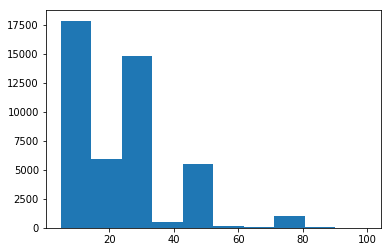

In [7]:
plt.hist(aqdq_df[aqdq_df['amount_cleaned'] < 100]['amount_cleaned'])

In [8]:
aqdq_df = aqdq_df.sort_values('time_received_cleaned')
aqdq_df.head()

,name,name_url,time_received,amount,amount_url,comment,amount_cleaned,time_received_cleaned
54099,Olla,/tracker/donor/420055/28,01/05/2020 16:34:13 +0000,$5.00,/tracker/donation/602237,Yes,5.0,2020-05-01 16:34:13
54098,Keizaron113,/tracker/donor/360862/28,01/05/2020 16:34:13 +0000,$5.00,/tracker/donation/602238,No,5.0,2020-05-01 16:34:13
54097,Xhatann,/tracker/donor/420061/28,01/05/2020 16:34:13 +0000,$5.00,/tracker/donation/602239,No,5.0,2020-05-01 16:34:13
54096,pudelmuetz,/tracker/donor/294447/28,01/05/2020 16:34:14 +0000,$5.00,/tracker/donation/602240,Yes,5.0,2020-05-01 16:34:14
54095,Leakspin175,/tracker/donor/389875/28,01/05/2020 16:34:14 +0000,$5.00,/tracker/donation/602241,No,5.0,2020-05-01 16:34:14


In [9]:
aqdq_df['cumumlative'] = aqdq_df['amount_cleaned'].cumsum()
aqdq_df.head()

,name,name_url,time_received,amount,amount_url,comment,amount_cleaned,time_received_cleaned,cumumlative
54099,Olla,/tracker/donor/420055/28,01/05/2020 16:34:13 +0000,$5.00,/tracker/donation/602237,Yes,5.0,2020-05-01 16:34:13,5.0
54098,Keizaron113,/tracker/donor/360862/28,01/05/2020 16:34:13 +0000,$5.00,/tracker/donation/602238,No,5.0,2020-05-01 16:34:13,10.0
54097,Xhatann,/tracker/donor/420061/28,01/05/2020 16:34:13 +0000,$5.00,/tracker/donation/602239,No,5.0,2020-05-01 16:34:13,15.0
54096,pudelmuetz,/tracker/donor/294447/28,01/05/2020 16:34:14 +0000,$5.00,/tracker/donation/602240,Yes,5.0,2020-05-01 16:34:14,20.0
54095,Leakspin175,/tracker/donor/389875/28,01/05/2020 16:34:14 +0000,$5.00,/tracker/donation/602241,No,5.0,2020-05-01 16:34:14,25.0


In [10]:
aqdq_df = aqdq_df.sort_index()
aqdq_df.head()

,name,name_url,time_received,amount,amount_url,comment,amount_cleaned,time_received_cleaned,cumumlative
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-12-01 16:19:07,3131932.78
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-12-01 16:06:30,3131927.78
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-12-01 14:17:00,3131902.78
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-12-01 14:14:38,3131877.78
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-12-01 13:42:53,3131852.78


In [11]:
donation_0_1000 = pd.read_csv("donation_comment_0_1000.csv")
donation_1000_5000 = pd.read_csv("donation_comment_1000_5000.csv")
donation_5000_10000 = pd.read_csv("donation_comment_5000_10000.csv")
donation_10000_15000 = pd.read_csv("donation_comment_10000_15000.csv", engine = "python")
donation_15000_20000 = pd.read_csv("donation_comment_15000_20000.csv")
donation_20000_35000 = pd.read_csv("donation_comment_20000_35000.csv")
donation_35000_end = pd.read_csv("donation_comment_35000_end.csv")

In [12]:
aqdq_df_full = pd.merge(aqdq_df, pd.concat([donation_0_1000, 
                                            donation_1000_5000,
                                            donation_5000_10000,
                                            donation_10000_15000,
                                            donation_15000_20000,
                                            donation_20000_35000,
                                            donation_35000_end]), how = 'outer', on = 'amount_url')

aqdq_df_full.head()

,name,name_url,time_received,amount,amount_url,comment_x,amount_cleaned,time_received_cleaned,cumumlative,comment_y
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-12-01 16:19:07,3131932.78,NaN
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-12-01 16:06:30,3131927.78,NaN
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-12-01 14:17:00,3131902.78,Thanks for all the great content! Go beat cancer!
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-12-01 14:14:38,3131877.78,NaN
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-12-01 13:42:53,3131852.78,NaN


In [13]:
aqdq_df_full.sample(5)

,name,name_url,time_received,amount,amount_url,comment_x,amount_cleaned,time_received_cleaned,cumumlative,comment_y
20983,Leave blank for Anonymous254,/tracker/donor/266435/28,01/11/2020 05:17:43 +0000,$100.00,/tracker/donation/640718,Yes,100.0,2020-11-01 05:17:43,1515815.62,Please save the Onion Knight.
49485,Dakitteh,/tracker/donor/421555/28,01/06/2020 18:53:53 +0000,$15.00,/tracker/donation/607659,Yes,15.0,2020-06-01 18:53:53,195239.63,"Alright, I brushed my teeth, ate my vegetables..."
11315,Munpie,/tracker/donor/431311/28,01/12/2020 02:17:26 +0000,$25.00,/tracker/donation/651845,Yes,25.0,2020-12-01 02:17:26,2179746.52,Bonus incentive please!
36817,Ninja Kid,/tracker/donor/350072/28,01/09/2020 02:44:09 +0000,$50.00,/tracker/donation/622405,Yes,50.0,2020-09-01 02:44:09,707786.46,Zelda Glitch Exhibition HOOOONK- I mean HYYYPE!
3987,EarthboundZE,/tracker/donor/328651/28,01/12/2020 05:06:12 +0000,$25.00,/tracker/donation/661029,Yes,25.0,2020-12-01 05:06:12,2949484.61,Let's go crowd!


In [14]:
aqdq_df_full.columns

Index(['name', 'name_url', 'time_received', 'amount', 'amount_url',
       'comment_x', 'amount_cleaned', 'time_received_cleaned', 'cumumlative',
       'comment_y'],
      dtype='object')

In [15]:
aqdq_df_full.columns = ['name', 'name_url', 'time_received', 'amount', 'amount_url',
                       'has_comment', 'amount_cleaned', 'time_received_cleaned', 'cumumlative',
                       'comment']

aqdq_df_full.head()

,name,name_url,time_received,amount,amount_url,has_comment,amount_cleaned,time_received_cleaned,cumumlative,comment
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-12-01 16:19:07,3131932.78,NaN
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-12-01 16:06:30,3131927.78,NaN
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-12-01 14:17:00,3131902.78,Thanks for all the great content! Go beat cancer!
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-12-01 14:14:38,3131877.78,NaN
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-12-01 13:42:53,3131852.78,NaN


In [16]:
aqdq_df_full = aqdq_df_full.dropna(subset = ['name'])

## Checkpoint

In [17]:
event_timing = pd.read_csv("eventTimings.csv")
event_timing.tail()

,Name,Players,Description,Start Time,End Time,Bid Wars
136,Super Mario Maker 2 4v4 Blind Relay Race,"Aurateur, Barbarian, Carl Sagan, PangaeaPanga,...",Full production notes: https://docs.google.com...,"January 12th, 2020, 9:42:00 AM","January 12th, 2020, 11:00:00 AM",No
137,Super Mario Maker 2 Tas Tas,TASBot,NaN,"January 12th, 2020, 11:00:00 AM","January 12th, 2020, 11:20:00 AM",Yes
138,The Legend Of Zelda: Link's Awakening (2019) Any%,TGH,NaN,"January 12th, 2020, 11:20:00 AM","January 12th, 2020, 1:04:00 PM",Yes
139,Super Metroid Impossible Any%,Oatsngoats,NaN,"January 12th, 2020, 1:04:00 PM","January 12th, 2020, 3:31:00 PM",Yes
140,Finale The End,Various,The End,"January 12th, 2020, 3:31:00 PM","January 12th, 2020, 3:51:00 PM",No


In [18]:
start_time = []

for i in event_timing['Start Time']:
    i = i.replace("th", "").replace("st", "").replace("nd", "").replace("rd", "")
    temp_date = datetime.datetime.strptime(i, "%B %d, %Y, %I:%M:00 %p")
    start_time.append(temp_date)#.strftime("%B %d, %Y, %I:%M:00 %p"))
    
event_timing['start_time_cleaned'] = start_time

In [19]:
end_time = []

for i in event_timing['End Time']:
    i = i.replace("th", "").replace("st", "").replace("nd", "").replace("rd", "")
    temp_date = datetime.datetime.strptime(i, "%B %d, %Y, %I:%M:00 %p")
    end_time.append(temp_date)#.strftime("%B %d, %Y, %I:%M:00 %p"))
    
event_timing['end_time_cleaned'] = end_time

In [20]:
time_diff = []

for index, row in event_timing.iterrows():
    diff = row['end_time_cleaned'] - row['start_time_cleaned']
    time_diff.append(diff.seconds)
    
event_timing['time_difference'] = time_diff

In [21]:
event_timing.head()

,Name,Players,Description,Start Time,End Time,Bid Wars,start_time_cleaned,end_time_cleaned,time_difference
0,Pre-Show Fun And Games,Tech Crew,NaN,"January 6th, 2020, 12:30:00 AM","January 6th, 2020, 1:04:00 AM",Yes,2020-01-06 00:30:00,2020-01-06 01:04:00,2040
1,A Hat In Time Any% Race,"Enhu, flarebear",NaN,"January 6th, 2020, 1:04:00 AM","January 6th, 2020, 2:06:00 AM",No,2020-01-06 01:04:00,2020-01-06 02:06:00,3720
2,Metroid: Zero Mission Any%,JRP2234,NaN,"January 6th, 2020, 2:06:00 AM","January 6th, 2020, 3:05:00 AM",No,2020-01-06 02:06:00,2020-01-06 03:05:00,3540
3,Mega Man 7 100%,PJ,NaN,"January 6th, 2020, 3:05:00 AM","January 6th, 2020, 4:17:00 AM",No,2020-01-06 03:05:00,2020-01-06 04:17:00,4320
4,Ratchet & Clank Future: Tools Of Destruction Any%,KillaLombax,NaN,"January 6th, 2020, 4:17:00 AM","January 6th, 2020, 5:39:00 AM",No,2020-01-06 04:17:00,2020-01-06 05:39:00,4920


In [96]:
event_detail_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,,2020-01-06 00:30:00,2020-01-06 01:04:00,2040
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,2020-01-06 01:04:00,2020-01-06 02:06:00,3720
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,2020-01-06 02:06:00,2020-01-06 03:05:00,3540
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,2020-01-06 03:05:00,2020-01-06 04:17:00,4320
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,2020-01-06 04:17:00,2020-01-06 05:39:00,4920


In [22]:
test_time = aqdq_df_full.iloc[2900]['time_received_cleaned']
test_time

Timestamp('2020-12-01 05:17:57')

In [23]:
event_timing.iloc[0]['start_time_cleaned']

Timestamp('2020-01-06 00:30:00')

In [24]:
event_timing.iloc[0]['end_time_cleaned']

Timestamp('2020-01-06 01:04:00')

In [25]:
test_time > event_timing.iloc[0]['start_time_cleaned']

True

In [26]:
test_time < event_timing.iloc[0]['end_time_cleaned']

False

## Checkpoint

In [54]:
event_details = pd.read_csv("eventBreakdownDetails.csv", header = None)
event_details.head(20)

,0,1,2,3,4
0,January 6th,12:30 AM,Pre-Show,Tech Crew,0:10:00
1,January 6th,0:24:00,Fun and Games —,GhostBird,NaN
2,January 6th,1:04 AM,A Hat in Time,"flarebear, Enhu",0:19:27
3,January 6th,0:42:33,Any% Race — PC,GhostBird,NaN
4,January 6th,2:06 AM,Metroid: Zero Mission,JRP2234,0:18:23
5,January 6th,0:40:37,Any% — GBA,KrunchyLex,NaN
6,January 6th,3:05 AM,Mega Man 7,PJ,0:22:20
7,January 6th,0:49:40,100% — SNES,KrunchyLex,NaN
8,January 6th,4:17 AM,Ratchet & Clank Future: Tools of Destruction,KillaLombax,0:19:57
9,January 6th,1:02:03,Any% — PS3,Geeketiquette,NaN


In [55]:
date = []
time_start = []
run_length = []
game = []
run_type = []
runner = []
host = []
setup_length = []

for index, row in event_details.iterrows():
    # if row is odd
    if index % 2 != 0:
        date.append(row[0])
        run_length.append(row[1])
        run_type.append(row[2])
        runner.append(row[3])
    else:
        time_start.append(row[1])
        game.append(row[2])
        host.append(row[3])
        setup_length.append(row[4])
        
event_detail_df = pd.DataFrame({"date": date,
                                "game": game,
                                "game_type": run_type,
                                "time_start": time_start,
                                "setup_length": setup_length,
                                "run_length": run_length,
                                "runner": runner,
                                "host": host
                                })

event_detail_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host
0,January 6th,Pre-Show,Fun and Games —,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew
1,January 6th,A Hat in Time,Any% Race — PC,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu"
2,January 6th,Metroid: Zero Mission,Any% — GBA,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234
3,January 6th,Mega Man 7,100% — SNES,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ
4,January 6th,Ratchet & Clank Future: Tools of Destruction,Any% — PS3,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax


In [56]:
game_type = []
console = []

for i in event_detail_df['game_type']:
    i_split = i.split("—")
    game_type.append(i_split[0].rstrip())
    try:
        console.append(i_split[1].lstrip())
    except:
        console.append(None)

event_detail_df['game_type'] = game_type
event_detail_df['console'] = console

event_detail_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console
0,January 6th,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,
1,January 6th,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC
2,January 6th,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA
3,January 6th,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES
4,January 6th,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3


In [57]:
date = []

for i in event_detail_df['date']:
    date.append(i.replace("th", ""))
    
event_detail_df['date'] = date
event_detail_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3


In [217]:
event_detail_df['real_time_start'] = event_detail_df['date'] + " 2020 " + event_detail_df['time_start']
event_detail_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,,January 6 2020 12:30 AM,2020-01-06 01:04:00,2040,600,1440
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,January 6 2020 1:04 AM,2020-01-06 02:06:00,3720,1167,2553
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,January 6 2020 2:06 AM,2020-01-06 03:05:00,3540,1103,2437
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,January 6 2020 3:05 AM,2020-01-06 04:17:00,4320,1340,2980
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,January 6 2020 4:17 AM,2020-01-06 05:39:00,4920,1197,123


In [218]:
real_real_time_start = []

for i in event_detail_df['real_time_start']:
    temp_date = datetime.datetime.strptime(i, "%B %d %Y %I:%M %p")
    real_real_time_start.append(temp_date.strftime('%Y-%d-%m %H:%M:%S'))
    
event_detail_df['real_time_start'] = real_real_time_start

real_real_time_start = []

for i in event_detail_df['real_time_start']:
    temp_date = datetime.datetime.strptime(i, "%Y-%d-%m %H:%M:%S")
    real_real_time_start.append(temp_date)
    
event_detail_df['real_time_start'] = real_real_time_start

In [219]:
event_detail_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,,2020-01-06 00:30:00,2020-01-06 01:04:00,2040,600,1440
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,2020-01-06 01:04:00,2020-01-06 02:06:00,3720,1167,2553
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,2020-01-06 02:06:00,2020-01-06 03:05:00,3540,1103,2437
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,2020-01-06 03:05:00,2020-01-06 04:17:00,4320,1340,2980
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,2020-01-06 04:17:00,2020-01-06 05:39:00,4920,1197,123


In [221]:
event_detail_df.iloc[0]['real_time_start']

Timestamp('2020-01-06 00:30:00')

In [222]:
event_detail_df['real_time_end'] = event_timing['end_time_cleaned']
event_detail_df['time_difference'] = event_timing['time_difference']
event_detail_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,,2020-01-06 00:30:00,2020-01-06 01:04:00,2040,600,1440
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,2020-01-06 01:04:00,2020-01-06 02:06:00,3720,1167,2553
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,2020-01-06 02:06:00,2020-01-06 03:05:00,3540,1103,2437
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,2020-01-06 03:05:00,2020-01-06 04:17:00,4320,1340,2980
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,2020-01-06 04:17:00,2020-01-06 05:39:00,4920,1197,123


In [223]:
setup_length = []

for i in event_detail_df['setup_length']:
    seconds = int(i.split(":")[1]) * 60 + int(i.split(":")[2])
    setup_length.append(seconds)
    
event_detail_df['real_setup_length'] = setup_length
event_detail_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,,2020-01-06 00:30:00,2020-01-06 01:04:00,2040,600,1440
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,2020-01-06 01:04:00,2020-01-06 02:06:00,3720,1167,2553
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,2020-01-06 02:06:00,2020-01-06 03:05:00,3540,1103,2437
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,2020-01-06 03:05:00,2020-01-06 04:17:00,4320,1340,2980
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,2020-01-06 04:17:00,2020-01-06 05:39:00,4920,1197,123


In [111]:
run_length = []

for i in event_detail_df['run_length']:
    seconds = int(i.split(":")[1]) * 60 + int(i.split(":")[2])
    run_length.append(seconds)
    
event_detail_df['real_run_length'] = run_length
event_detail_df.head()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,,2020-01-06 00:30:00,2020-01-06 01:04:00,2040,600,1440
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,2020-01-06 01:04:00,2020-01-06 02:06:00,3720,1167,2553
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,2020-01-06 02:06:00,2020-01-06 03:05:00,3540,1103,2437
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,2020-01-06 03:05:00,2020-01-06 04:17:00,4320,1340,2980
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,2020-01-06 04:17:00,2020-01-06 05:39:00,4920,1197,123


In [142]:
event_detail_df.to_csv("eventBreakdownDetailsCleaned.csv", index = None)

In [287]:
test = pd.read_csv("eventBreakdownDetailsCleaned.csv")

test

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length
0,January 6,Pre-Show,Fun and Games,12:30 AM,0:10:00,0:24:00,GhostBird,Tech Crew,NaN,2020-01-06 00:30:00,2020-01-06 01:04:00,2040,600,1440
1,January 6,A Hat in Time,Any% Race,1:04 AM,0:19:27,0:42:33,GhostBird,"flarebear, Enhu",PC,2020-01-06 01:04:00,2020-01-06 02:06:00,3720,1167,2553
2,January 6,Metroid: Zero Mission,Any%,2:06 AM,0:18:23,0:40:37,KrunchyLex,JRP2234,GBA,2020-01-06 02:06:00,2020-01-06 03:05:00,3540,1103,2437
3,January 6,Mega Man 7,100%,3:05 AM,0:22:20,0:49:40,KrunchyLex,PJ,SNES,2020-01-06 03:05:00,2020-01-06 04:17:00,4320,1340,2980
4,January 6,Ratchet & Clank Future: Tools of Destruction,Any%,4:17 AM,0:19:57,1:02:03,Geeketiquette,KillaLombax,PS3,2020-01-06 04:17:00,2020-01-06 05:39:00,4920,1197,123
5,January 6,Star Wars - Escape from Yavin 4: The Lost Maps,Any% no VRGI,5:39 AM,0:20:12,0:50:48,Geeketiquette,CovertMuffin,PC,2020-01-06 05:39:00,2020-01-06 06:50:00,4260,1212,3048
6,January 6,The Binding Of Isaac Afterbirth+,R+7 (S6),6:50 AM,0:23:19,1:12:41,cartridgeblowers,StoneAgeMarcus,PC,2020-01-06 06:50:00,2020-01-06 08:26:00,5760,1399,761
7,January 6,Super Mario Bros. 3,100% race,8:26 AM,0:23:32,1:14:28,cartridgeblowers,"mitchflowerpower, TheHaxor, stewie_cartman",NES,2020-01-06 08:26:00,2020-01-06 10:04:00,5880,1412,868
8,January 6,The Legend of Zelda: Skyward Sword,Any%,10:04 AM,0:27:24,2:25:36,Kungfufruitcup,gymnast86,Wii,2020-01-06 10:04:00,2020-01-06 12:57:00,10380,1644,1536
9,January 6,Dino Crisis 2,Any%,12:57 PM,0:14:52,1:20:08,CovertMuffin,WOLFDNC,PS3,2020-01-06 12:57:00,2020-01-06 14:32:00,5700,892,1208


## Checkpoint

In [249]:
aqdq_df_full.head(10)

,name,name_url,time_received,amount,amount_url,has_comment,amount_cleaned,time_received_cleaned,cumumlative,comment
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-01-12 16:19:07,3131932.78,NaN
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-01-12 16:06:30,3131927.78,NaN
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-01-12 14:17:00,3131902.78,Thanks for all the great content! Go beat cancer!
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-01-12 14:14:38,3131877.78,NaN
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-01-12 13:42:53,3131852.78,NaN
5,Mike and Felicia,/tracker/donor/434737/28,01/12/2020 13:32:35 +0000,$25.00,/tracker/donation/665695,No,25.0,2020-01-12 13:32:35,3131827.78,NaN
6,Yosh1,/tracker/donor/434736/28,01/12/2020 12:40:02 +0000,$25.00,/tracker/donation/665694,No,25.0,2020-01-12 12:40:02,3131802.78,NaN
7,Gordon Freeman,/tracker/donor/8815/28,01/12/2020 12:32:45 +0000,$25.00,/tracker/donation/665693,Yes,25.0,2020-01-12 12:32:45,3131777.78,N1
8,Steven Dawson,/tracker/donor/434735/28,01/12/2020 12:07:05 +0000,$10.00,/tracker/donation/665688,No,10.0,2020-01-12 12:07:05,3131752.78,NaN
9,SashDB,/tracker/donor/48270/28,01/12/2020 11:37:38 +0000,$5.00,/tracker/donation/665687,Yes,5.0,2020-01-12 11:37:38,3131742.78,Last one?


In [251]:
event_detail_df.tail()

,date,game,game_type,time_start,setup_length,run_length,runner,host,console,real_time_start,real_time_end,time_difference,real_setup_length,real_run_length
136,January 12,Super Mario Maker 2,4v4 Blind Relay Race,9:42 AM,0:03:00,1:15:00,Skybilz,"Carl Sagan, grandpoobear, PangaeaPanga, Barbar...",Switch,2020-01-12 09:42:00,2020-01-12 11:00:00,4680,180,900
137,January 12,Super Mario Maker 2 TAS,TAS,11:00 AM,0:10:00,0:10:00,Skybilz,TASBot,Switch,2020-01-12 11:00:00,2020-01-12 11:20:00,1200,600,600
138,January 12,The Legend of Zelda: Link's Awakening (2019),Any%,11:20 AM,0:26:52,1:17:08,SporadicErratic,TGH,Switch,2020-01-12 11:20:00,2020-01-12 13:04:00,6240,1612,1028
139,January 12,Super Metroid Impossible,Any%,1:04 PM,0:03:18,2:23:42,AnEternalEnigma,Oatsngoats,SNES,2020-01-12 13:04:00,2020-01-12 15:31:00,8820,198,1422
140,January 12,Finale,The End,3:31 PM,0:10:00,0:10:00,AnEternalEnigma,Various,,2020-01-12 15:31:00,2020-01-12 15:51:00,1200,600,600


In [231]:
time_received_cleaned = []

for i in aqdq_df_full['time_received_cleaned']:
    temp_date = datetime.datetime.strptime(str(i), "%Y-%d-%m %H:%M:%S")
    time_received_cleaned.append(temp_date)
    
aqdq_df_full['time_received_cleaned'] = time_received_cleaned

In [234]:
aqdq_df_full.iloc[100]['time_received_cleaned']

Timestamp('2020-01-12 07:30:26')

In [241]:
event_detail_df.iloc[-7]['real_time_start']

Timestamp('2020-01-12 07:09:00')

In [244]:
event_detail_df.iloc[-7]['real_time_end']

Timestamp('2020-01-12 08:57:00')

In [247]:
aqdq_df_full.iloc[100]['time_received_cleaned'] > event_detail_df.iloc[-7]['real_time_start'] and \
aqdq_df_full.iloc[100]['time_received_cleaned'] < event_detail_df.iloc[-7]['real_time_end']

True

In [255]:
aqdq_df_full.head()

,name,name_url,time_received,amount,amount_url,has_comment,amount_cleaned,time_received_cleaned,cumumlative,comment
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-01-12 16:19:07,3131932.78,NaN
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-01-12 16:06:30,3131927.78,NaN
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-01-12 14:17:00,3131902.78,Thanks for all the great content! Go beat cancer!
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-01-12 14:14:38,3131877.78,NaN
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-01-12 13:42:53,3131852.78,NaN


In [280]:
segment = []
amount_url = []

for index_main, row_main in aqdq_df_full.iterrows():
    for index_game, row_game in event_detail_df.iterrows():
        if (row_main['time_received_cleaned'] > row_game['real_time_start']) and \
           (row_main['time_received_cleaned'] < row_game['real_time_end']):
            segment.append(row_game['game'])
            amount_url.append(row_main['amount_url'])
            
segment_df = pd.DataFrame({"amount_url":amount_url,
                           "segment": segment})

segment_df

,amount_url,segment
0,/tracker/donation/665698,Super Metroid Impossible
1,/tracker/donation/665697,Super Metroid Impossible
2,/tracker/donation/665696,Super Metroid Impossible
3,/tracker/donation/665695,Super Metroid Impossible
4,/tracker/donation/665694,The Legend of Zelda: Link's Awakening (2019)
5,/tracker/donation/665693,The Legend of Zelda: Link's Awakening (2019)
6,/tracker/donation/665688,The Legend of Zelda: Link's Awakening (2019)
7,/tracker/donation/665687,The Legend of Zelda: Link's Awakening (2019)
8,/tracker/donation/665686,The Legend of Zelda: Link's Awakening (2019)
9,/tracker/donation/665684,Super Mario Maker 2


In [281]:
aqdq_df_full_v2 = pd.merge(aqdq_df_full, segment_df, how = 'outer', on = 'amount_url')

aqdq_df_full_v2.head()

,name,name_url,time_received,amount,amount_url,has_comment,amount_cleaned,time_received_cleaned,cumumlative,comment,segment
0,ducomors,/tracker/donor/434740/28,01/12/2020 16:19:07 +0000,$5.00,/tracker/donation/665700,No,5.0,2020-01-12 16:19:07,3131932.78,NaN,NaN
1,(No Name),/tracker/donor/434739/28,01/12/2020 16:06:30 +0000,$25.00,/tracker/donation/665699,No,25.0,2020-01-12 16:06:30,3131927.78,NaN,NaN
2,Mitchel,/tracker/donor/434738/28,01/12/2020 14:17:00 +0000,$25.00,/tracker/donation/665698,Yes,25.0,2020-01-12 14:17:00,3131902.78,Thanks for all the great content! Go beat cancer!,Super Metroid Impossible
3,mellyn,/tracker/donor/336894/28,01/12/2020 14:14:38 +0000,$25.00,/tracker/donation/665697,No,25.0,2020-01-12 14:14:38,3131877.78,NaN,Super Metroid Impossible
4,Joemoe224,/tracker/donor/371976/28,01/12/2020 13:42:53 +0000,$25.00,/tracker/donation/665696,No,25.0,2020-01-12 13:42:53,3131852.78,NaN,Super Metroid Impossible


In [284]:
aqdq_df_full_v2.isnull().sum()

name                         0
name_url                   346
time_received                0
amount                       0
amount_url                   0
has_comment                  0
amount_cleaned               0
time_received_cleaned        0
cumumlative                  0
comment                  17528
segment                   2039
dtype: int64

In [285]:
aqdq_df_full_v2.to_csv("adqd_df_2020_01_15.csv", index = None)